In [ ]:
# Import the drive module from the google.colab package
from google.colab import drive

# Mount the Google Drive at the specified location '/content/drive'
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary modules from libraries
from matplotlib.pyplot import imshow
import matplotlib.cm as cm
import matplotlib.pylab as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL
from PIL import ImageFilter
import cv2
import itertools
import random
import keras
import imutils
from imutils import paths
import os
from keras import optimizers
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import callbacks
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose
from keras import backend as K
import tensorflow as tf

# Display matplotlib plots inline
%matplotlib inline

In [ ]:
def pil_image(img_path):
   # Open the image at the specified path and convert it to grayscale
    pil_im =PIL.Image.open(img_path).convert('L')

    # Resize the image to 105x105 pixels
    pil_im=pil_im.resize((105,105))

    #imshow(np.asarray(pil_im))
    return pil_im

# Augumentation Steps
1) Noise
2) Blur
3) Perpective Rotation
4) Shading
5) Variable Character Spacing
6) Variable Aspect Ratio

In [ ]:
def noise_image(pil_im):
    # Adding Noise to image
    img_array = np.asarray(pil_im)
    mean = 0.0   # some constant
    std = 5   # some constant (standard deviation)
    noisy_img = img_array + np.random.normal(mean, std, img_array.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    noise_img = PIL.Image.fromarray(np.uint8(noisy_img_clipped)) # output

    #imshow((noisy_img_clipped ).astype(np.uint8))
    noise_img=noise_img.resize((105,105))
    return noise_img

In [ ]:
def blur_image(pil_im):

    #Adding Blur to image
    blur_img = pil_im.filter(ImageFilter.GaussianBlur(radius=3)) # ouput

    #imshow(blur_img)
    blur_img=blur_img.resize((105,105))
    return blur_img

In [ ]:
def affine_rotation(img):

    #img=cv2.imread(img_path,0)
    rows, columns = img.shape

    point1 = np.float32([[10, 10], [30, 10], [10, 30]])
    point2 = np.float32([[20, 15], [40, 10], [20, 40]])

    A = cv2.getAffineTransform(point1, point2)

    output = cv2.warpAffine(img, A, (columns, rows))
    affine_img = PIL.Image.fromarray(np.uint8(output)) # affine rotated output
    #imshow(output)
    affine_img=affine_img.resize((105,105))
    return affine_img


In [ ]:
def gradient_fill(image):
    #image=cv2.imread(img_path,0)
    # Calculate the Laplacian gradient of the input image
    laplacian = cv2.Laplacian(image,cv2.CV_64F)
    # Resize the gradient image to 105x105 pixels
    laplacian = cv2.resize(laplacian, (105, 105))
    # Return the resized gradient image
    return laplacian

## Preparing Dataset

In [ ]:
# Path to the directory containing the images
data_path = "/content/drive/MyDrive/FontJK"

# Lists to store the image data and corresponding labels
data=[]
labels=[]

# Get a list of all image file paths in the directory and shuffle them
imagePaths = sorted(list(paths.list_images(data_path)))
random.seed(42)
random.shuffle(imagePaths)

In [ ]:
def conv_label(label):

    # Convert label string to corresponding numeric value
    if label == 'Calvin':
        return 0
    elif label == 'Calligraphy':
        return 1
    elif label == 'Elephant':
        return 2
    elif label == 'Gill sans':
        return 3
    elif label == 'Roboto':
        return 4

In [ ]:
# List of augmentation types
augument=["blur","noise","affine","gradient"]

# Generate combinations of augmentation types
a=itertools.combinations(augument, 4)

# Iterate over the combinations and print each combination
for i in list(a):
    print(list(i))

['blur', 'noise', 'affine', 'gradient']


In [ ]:
counter=0
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    label = conv_label(label)
    pil_img = pil_image(imagePath)
    #imshow(pil_img)

    # Adding original image
    org_img = img_to_array(pil_img)

    #print(org_img.shape)
    data.append(org_img)
    labels.append(label)

    augument=["noise","blur","affine","gradient"]
    for l in range(0,len(augument)):

        a=itertools.combinations(augument, l+1)

        for i in list(a):
            combinations=list(i)
            print(len(combinations))
            temp_img = pil_img
            for j in combinations:

                if j == 'noise':
                    # Adding Noise image
                    temp_img = noise_image(temp_img)

                elif j == 'blur':
                    # Adding Blur image
                    temp_img = blur_image(temp_img)
                    #imshow(blur_img)


                elif j == 'affine':
                    open_cv_affine = np.array(pil_img)
                    # Adding affine rotation image
                    temp_img = affine_rotation(open_cv_affine)

                elif j == 'gradient':
                    open_cv_gradient = np.array(pil_img)
                    # Adding gradient image
                    temp_img = gradient_fill(open_cv_gradient)

            temp_img = img_to_array(temp_img)
            data.append(temp_img)
            labels.append(label)

Streaming output truncated to the last 5000 lines.
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2

In [ ]:
data = np.asarray(data, dtype="float") / 255.0
labels = np.array(labels)
print("Success")
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

Success


In [ ]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=5)
testY = to_categorical(testY, num_classes=5)

In [ ]:
# Create an ImageDataGenerator object for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

In [ ]:
tf.keras.backend.set_image_data_format('channels_last')

In [ ]:
#K.set_image_dim_ordering('tf')

In [ ]:
 def create_model():
  model=Sequential()

  # Cu Layers
  model.add(Conv2D(64, kernel_size=(48, 48), activation='relu', input_shape=(105,105,1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(24, 24), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2DTranspose(128, (24,24), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
  model.add(UpSampling2D(size=(2, 2)))

  model.add(Conv2DTranspose(64, (12,12), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
  model.add(UpSampling2D(size=(2, 2)))

  #Cs Layers
  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Flatten())

  model.add(Dense(4096, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(4096,activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(2383,activation='relu'))

  model.add(Dense(5, activation='softmax'))

  return model

In [ ]:
#batch_size = 128
#epochs = 50
#model= create_model()
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Change the optimizer to use learning_rate_decay instead of decay
#sgd = optimizers.SGD(learning_rate=0.01,learning_rate_decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
import numpy as np

def learning_rate_schedule(epoch):
    initial_lr = 0.01
    decay = 1e-6
    lr = initial_lr / (1 + decay * epoch)
    return lr

batch_size = 128
epochs = 50
model = create_model()

# Create the SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Compile the model with the SGD optimizer and a learning rate scheduler
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

# Create a Learning Rate Scheduler callback
lr_scheduler = LearningRateScheduler(learning_rate_schedule)



In [ ]:
# Define early stopping callback to monitor validation loss
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min')

# Define model checkpoint callback to save the best model
filepath="top_model.h5"   # File path to save the best model

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# List of callbacks to be used during training
callbacks_list = [early_stopping,checkpoint]

In [ ]:
# Train the model using the training data
# Shuffle the training data
# Use a batch size of batch_size
# Train for a total of epochs epochs
# Use verbose mode for logging (1: progress bar)
# Use the validation data (testX and testY) for validation during training
# Use the defined callbacks callbacks_list during training

In [ ]:
model.fit(trainX, trainY,shuffle=True,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY),callbacks=callbacks_list)

Epoch 1/50
114/114 [==============================] - ETA: 0s - loss: 0.1054 - accuracy: 0.5492
Epoch 1: val_loss improved from inf to 0.12894, saving model to top_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


114/114 [==============================] - 107s 939ms/step - loss: 0.1054 - accuracy: 0.5492 - val_loss: 0.1289 - val_accuracy: 0.4244
Epoch 2/50
114/114 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.8211
Epoch 2: val_loss did not improve from 0.12894
114/114 [==============================] - 82s 721ms/step - loss: 0.0508 - accuracy: 0.8211 - val_loss: 0.1599 - val_accuracy: 0.3786
Epoch 3/50
114/114 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9332
Epoch 3: val_loss improved from 0.12894 to 0.11709, saving model to top_model.h5
114/114 [==============================] - 110s 970ms/step - loss: 0.0206 - accuracy: 0.9332 - val_loss: 0.1171 - val_accuracy: 0.5876
Epoch 4/50
114/114 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9499
Epoch 4: val_loss did not improve from 0.11709
114/114 [==============================] - 77s 679ms/step - loss: 0.0155 - accuracy: 0.9499 - val_loss: 0.1480 - val_accuracy: 0.5244

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.048244401812553406
Test accuracy: 0.8537696599960327


In [ ]:
from keras.models import load_model
model = load_model('top_model.h5')

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.005096420645713806
Test accuracy: 0.9857083559036255


In [ ]:
# Path to the image file
img_path="/content/drive/MyDrive/FontJK/Calvin/Image_197.jpg"

# Open the image and convert it to grayscale
pil_im =PIL.Image.open(img_path).convert('L')

# Apply the blur_image function to the image
pil_im=blur_image(pil_im)

# Convert the blurred image to a NumPy array
org_img = img_to_array(pil_im)

In [ ]:
def rev_conv_label(label):
    if label == 0 :
        return 'Calvin'
    elif label == 1:
        return 'Calligraphy'
    elif label == 2 :
        return 'Elephant'
    elif label == 3 :
        return 'Gill sans'
    elif label == 4:
        return 'Roboto'

In [ ]:
# Initialize an empty list to store image data
data=[]

# Append the NumPy array of the blurred image to the list
data.append(org_img)

# Convert the list of images to a NumPy array and scale the pixel values to [0, 1]
data = np.asarray(data, dtype="float") / 255.0

In [ ]:
# Assuming your model is a Sequential model and you are predicting classes for 'data'

# Make predictions using the model
predictions = model.predict(data)

# Extract the predicted classes based on the highest probability
y = np.argmax(predictions, axis=1)

# Now 'y' contains the predicted classes for the input data


1/1 [==============================] - 0s 20ms/step


In [ ]:
#y = model.predict_classes(data)

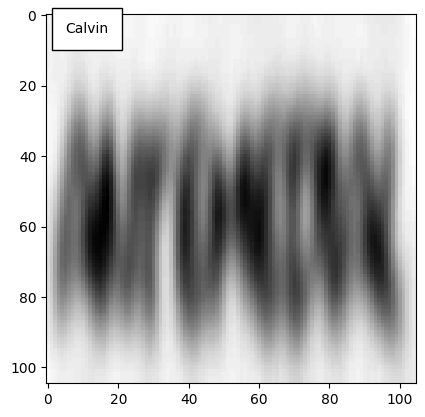

In [ ]:
label = rev_conv_label(int(y[0]))
fig, ax = plt.subplots(1)
ax.imshow(pil_im, interpolation='nearest', cmap=cm.gray)  # Display the image using imshow, with interpolation and grayscale colormap
ax.text(5, 5, label , bbox={'facecolor': 'white', 'pad': 10})  # Add text to the image indicating the label, with a white background and padding
plt.show()

#**Conclusion:**

1. **Text Image Classification using CNN:**

* Successfully implemented a Convolutional Neural Network (CNN) for text image classification.
* Achieved a test accuracy of 85.37%.
* The highest test accuracy achieved by the model is 98.57%.
* The model's train accuracy is 99.57%.

2. **Prediction for Calvin Image:**

* Successfully performed predictions for an image from the 'Calvin' class.

3. **Potential Business Applications:**

* *OCR Systems:*
  * The model can be used in Optical Character Recognition (OCR) systems for reading and processing text from images.

* *Document Analysis:*
  * It can be used in document analysis systems to categorize and organize text documents based on their content.

* *Automated Data Entry:* The model can automate the data entry process by extracting text information from images and entering it into digital formats.

* *Security Systems:*
  * It can be used in security systems for text-based image classification, such as identifying handwritten signatures or validating documents.

* *Content Moderation:*
  * The model can be used for content moderation in social media platforms to detect and filter out inappropriate text content.

* *Text-Based Image Search:*
  * It can be used to enable text-based image search functionalities in applications where users can search for images based on textual descriptions.

**Conclusion:**
The CNN model has demonstrated strong performance in text image classification tasks, making it a valuable tool for various business applications requiring text recognition and classification in images.